In [2]:
import librosa
import librosa.display


from pydub import AudioSegment


import numpy as np

import matplotlib.pyplot as plt

In [3]:
# 读取AMR格式文件
input_file = "D:\\PycharmProjects\\Speech_Depression\\test.amr"


audio = AudioSegment.from_file(input_file, format="amr")


# 将AMR格式文件转换为其他格式（比如WAV）


audio.export("output.wav", format="wav")

<_io.BufferedRandom name='output.wav'>

In [4]:
audio_data = r"output.wav"
x, sr = librosa.load(audio_data)  # x为音频数据，sr为采样率(会重采样到22050)
print(x.shape, sr)

(1188054,) 22050


In [5]:
print("x:", x, "\n")
print("x shape:", np.shape(x), "\n")
print("Sample Rate (KHz):", sr, "\n")
print("Check Len of Audio:", np.shape(x)[0] / sr)

x: [9.29141970e-06 1.36164335e-05 1.35150931e-05 ... 6.13244774e-05
 4.00110002e-05 1.68269562e-05] 

x shape: (1188054,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 53.88


- 获得音频的时长

In [6]:
len_of_audio = librosa.get_duration(
    y=x, sr=sr, S=None, n_fft=2048, hop_length=512, center=True, filename=None
)
len_of_audio

D:\local temp\ipykernel_24300\3074117274.py:1: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  len_of_audio = librosa.get_duration(


53.88

- 获得采样率，原始数据的sr

In [7]:
sr = librosa.get_samplerate(audio_data)
sr

8000

- 去除两端沉默

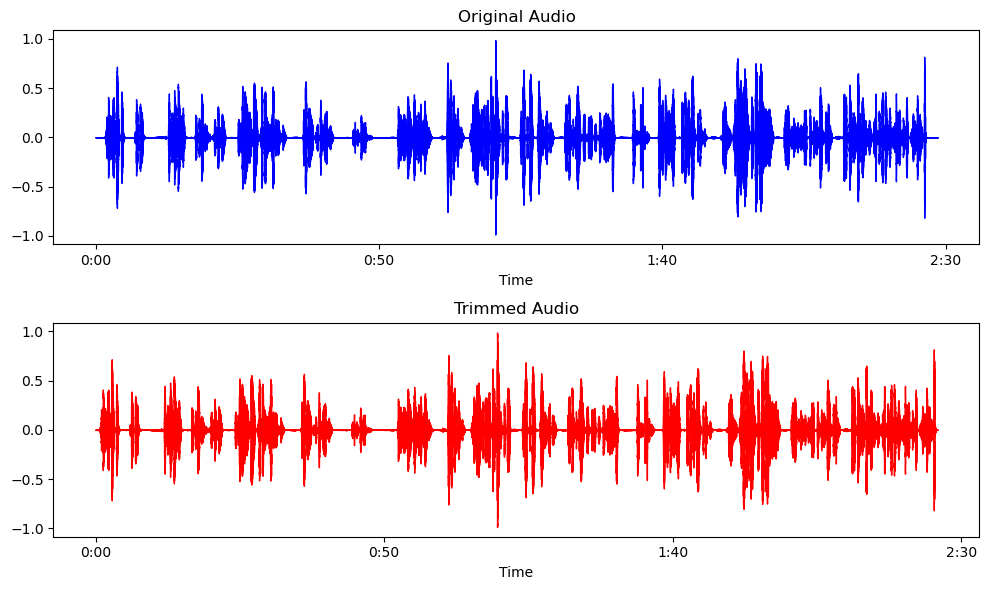

Start time: 0.96 seconds
End time: 146.816 seconds


In [8]:
# 裁剪音频信号中的静音部分
trimmed_audio, index = librosa.effects.trim(x)

# index 包含裁剪后的起始和结束样本的位置
start = index[0] / sr
end = index[1] / sr

# 显示原始和裁剪后的波形图
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(x, sr=sr, color="b")
plt.title("Original Audio")

plt.subplot(2, 1, 2)
librosa.display.waveshow(trimmed_audio, sr=sr, color="r")
plt.title("Trimmed Audio")

plt.tight_layout()
plt.show()

print(f"Start time: {start} seconds")
print(f"End time: {end} seconds")

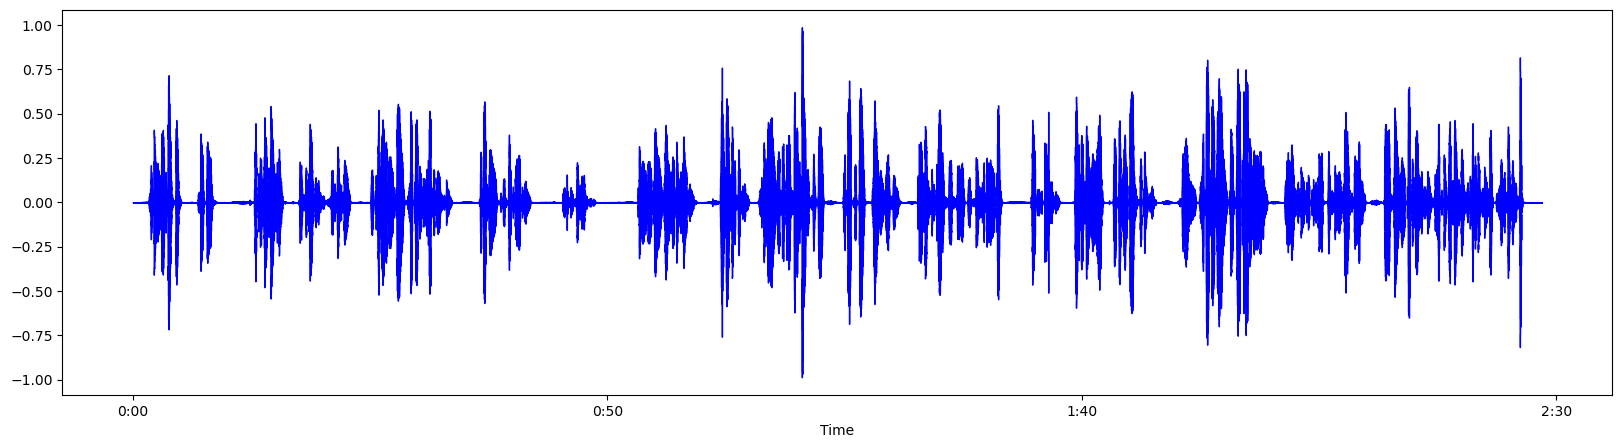

In [9]:
%matplotlib inline

import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr, color="b")
plt.show()

- 频谱图（Spectrogram）

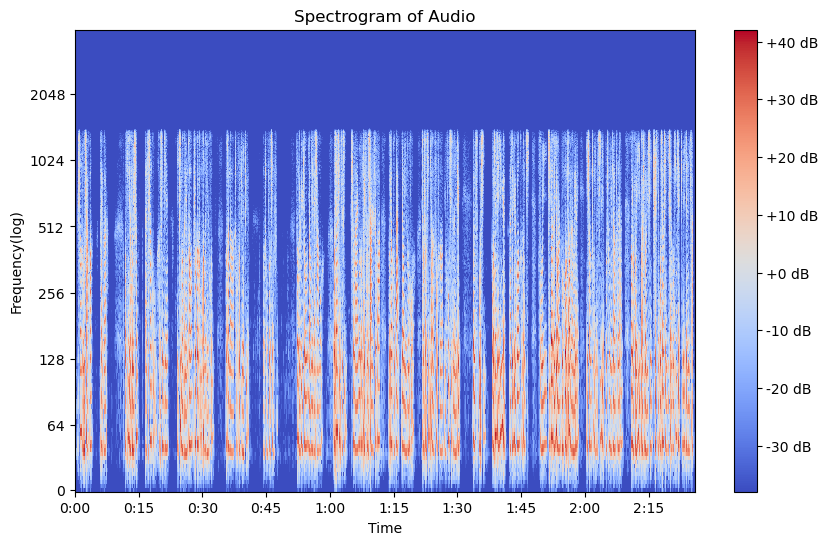

In [10]:
# 计算音频数据的短时傅里叶变换（STFT）
D = librosa.stft(trimmed_audio)

# 将STFT转换为分贝（dB）
DB = librosa.amplitude_to_db(abs(D))

# 绘制频谱图
plt.figure(figsize=(10, 6))
librosa.display.specshow(DB, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram of Audio")
plt.xlabel("Time")
plt.ylabel("Frequency(log)")
plt.show()

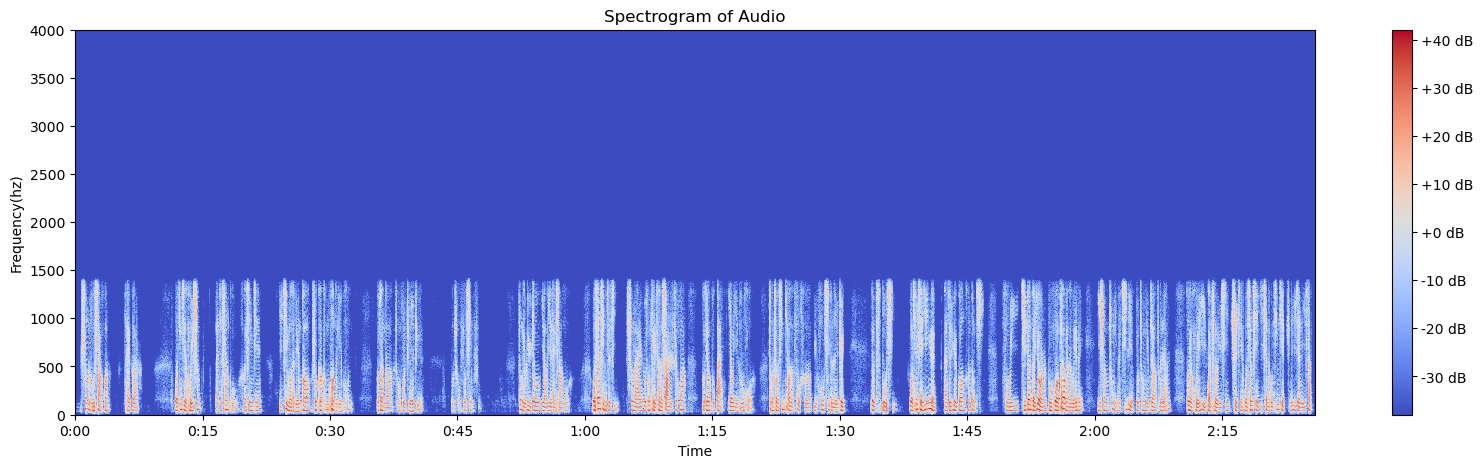

In [11]:
# 计算音频数据的短时傅里叶变换（STFT）
D = librosa.stft(trimmed_audio)

# 将STFT转换为分贝（dB）
DB = librosa.amplitude_to_db(abs(D))

# 绘制频谱图
plt.figure(figsize=(20, 5))
librosa.display.specshow(DB, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram of Audio")
plt.xlabel("Time")
plt.ylabel("Frequency(hz)")
plt.show()

- 梅尔频率倒谱系数（MFCC）

In [12]:
# 计算MFCC特征
mfccs = librosa.feature.mfcc(y=trimmed_audio, sr=sr, n_mfcc=13)  # 提取13个MFCC系数

mfccs

array([[-5.4348187e+02, -5.3679364e+02, -5.3503497e+02, ...,
        -5.2953778e+02, -5.3697137e+02, -5.4690991e+02],
       [ 5.5092673e+00,  1.4881220e+01,  1.7388645e+01, ...,
         2.4331663e+01,  1.4486551e+01,  6.8398863e-01],
       [ 5.4224319e+00,  1.4541605e+01,  1.7103024e+01, ...,
         2.1730547e+01,  1.3735754e+01,  6.6318387e-01],
       ...,
       [ 3.5658216e+00,  8.0857391e+00,  9.7829695e+00, ...,
         3.1115692e+00,  3.0819488e+00,  1.4478502e-01],
       [ 3.2602680e+00,  7.2240186e+00,  8.5817766e+00, ...,
         3.6005535e+00,  2.4207830e+00,  6.3320026e-02],
       [ 2.9342270e+00,  6.3557949e+00,  7.4010692e+00, ...,
         3.9209924e+00,  1.9109459e+00, -1.5342783e-02]], dtype=float32)

In [13]:
mfccs.shape

(13, 2280)

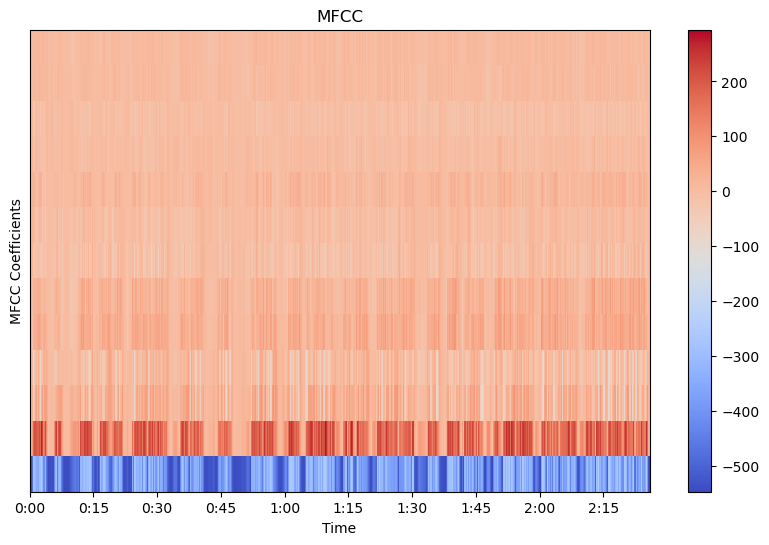

In [14]:
# 可视化MFCC特征
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis="time")
plt.colorbar()
plt.title("MFCC")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.show()

- 过零率（zero-crossing rate，ZCR）

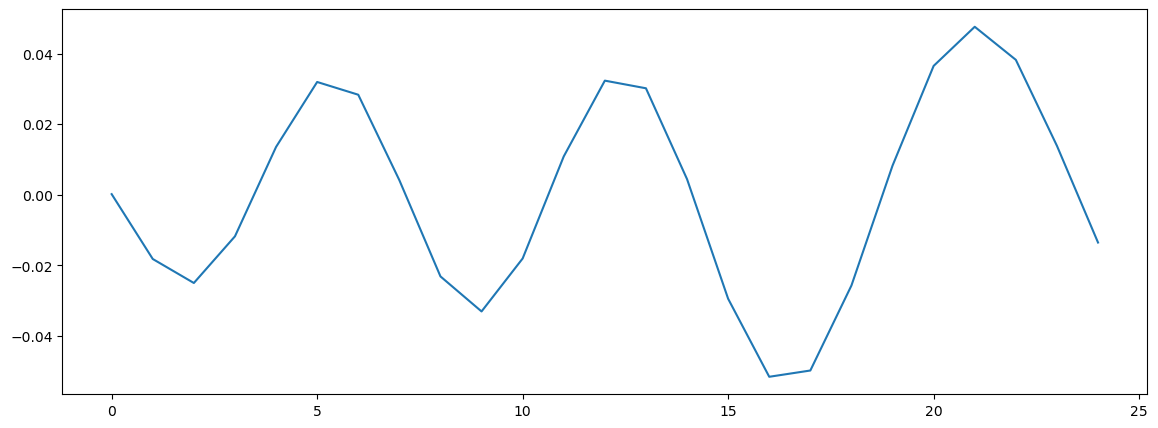

In [25]:
n0 = 7000
n1 = 7025
plt.figure(figsize=(14, 5))
plt.plot(trimmed_audio[n0:n1])
plt.show()

In [26]:
zero_crossings = librosa.zero_crossings(trimmed_audio[n0:n1], pad=False)

zero_crossings.shape

(25,)

In [27]:
zero_crossings.sum()

7

In [23]:
zero_crossings = librosa.feature.zero_crossing_rate(y=trimmed_audio)
zero_crossings.shape

(1, 2280)

In [24]:
zero_crossings[0].sum()

168.26611328125

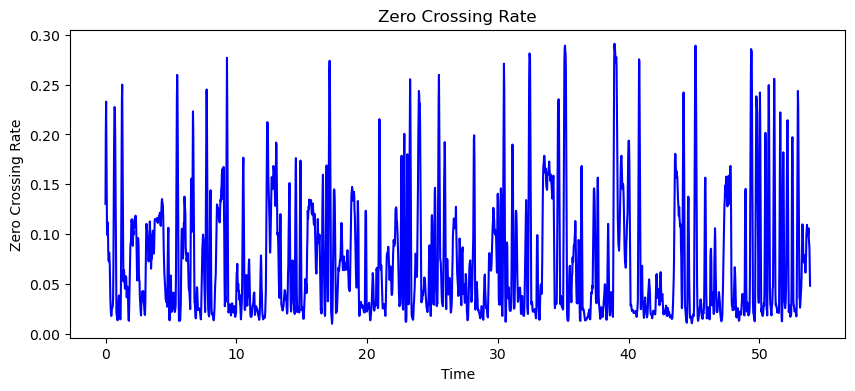

In [16]:
# 计算过零率
zero_crossings = librosa.feature.zero_crossing_rate(y=x)[0]

# 创建时间轴
frames = range(len(zero_crossings))
t = librosa.frames_to_time(frames)

# 绘制过零率图
plt.figure(figsize=(10, 4))
plt.plot(t, zero_crossings, color="blue")
plt.title("Zero Crossing Rate")
plt.xlabel("Time")
plt.ylabel("Zero Crossing Rate")
plt.show()